In [365]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(37)
X_MAX = 10
Y_MAX = 10

In [127]:
xx=[[1,1],[1,2],[1,3],[1,3]]
xx = set(tuple(element) for element in xx)
xx = list(xx)
xx

[(1, 2), (1, 3), (1, 1)]

[[3.36031116 5.97520684]
 [4.43172288 6.90752183]
 [6.29632318 2.04662548]
 [7.30047207 4.18605801]
 [8.63061346 0.39634373]]
[[7.300472067780714, 4.18605800828462, 4.4317228805309785, 6.907521832153503, 6.296323179612743, 2.0466254825117147], [7.300472067780714, 4.18605800828462, 3.3603111573163336, 5.975206840812531, 4.4317228805309785, 6.907521832153503], [7.300472067780714, 4.18605800828462, 3.3603111573163336, 5.975206840812531, 6.296323179612743, 2.0466254825117147], [8.630613462732045, 0.3963437307387663, 6.296323179612743, 2.0466254825117147, 7.300472067780714, 4.18605800828462]]


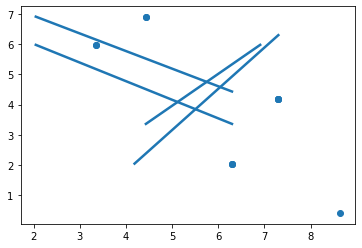

In [377]:
points = generate_points(num_to_generate = 5,  x_max = X_MAX, y_max = Y_MAX)
print(points)
temp_triangles = []
st = super_triangle(x_max = X_MAX, y_max = Y_MAX)
temp_triangles.append(st)
temp_triangles
triangles = []

for point in points:
    edge_buffer = []
    for triangle in temp_triangles:
        circle = define_circle(triangle[0:2], triangle[2:4], triangle[4:6])
        cx, cy, radius = circle[0], circle[1], circle[2]
        pos = (position_to_circle(point, cx, cy, radius))
        if pos == 'right':
            triangles.append(triangle)
            temp_triangles.remove(triangle)
        elif pos == 'in':
            temp_triangles.remove(triangle)
            add_edge(edge_buffer, triangle[0], triangle[1], triangle[2],triangle[3])
            add_edge(edge_buffer, triangle[0], triangle[1], triangle[4],triangle[5])
            add_edge(edge_buffer, triangle[4], triangle[5], triangle[2],triangle[3])
    # remove deplicate edges
    edge_buffer = set(tuple(element) for element in edge_buffer)
    edge_buffer = list(edge_buffer)
    
    # make triangles to temp
    for edge in edge_buffer:
        temp_triangles.append([point[0], point[1], edge[0], edge[1], edge[2], edge[3]])
    
triangles.extend(temp_triangles)
#     print(temp_triangles)
triangles = triangles_filter(triangles, st)
print(triangles)
draw_triangles(triangles)

In [375]:
def generate_points(num_to_generate, x_max, y_max):
    x = np.random.uniform(0, X_MAX, num_to_generate).reshape(-1, 1)
    y = np.random.uniform(0, y_max, num_to_generate).reshape(-1, 1)
    points = np.concatenate((x,y), axis = 1)
    points = points[points[:,0].argsort()]
    return points


def super_triangle(x_max, y_max):
    sup = [-3*x_max, -1*y_max, x_max, 3*y_max, 4*x_max, -1 *y_max]
    return sup

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

# def iteration(points, temp_triangles):
#     for point in points:
#         edge_buffer = {}


def add_edge(edge_buffer, x1, y1, x2, y2):
    if x1 > x2:
        add_edge(edge_buffer, x2, y2, x1, y1)
        return
    edge_buffer.append([x1, y1, x2, y2])


def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return [cx, cy, radius]


def position_to_circle(point, cx, cy, radius):
    # right
    if cx+radius < point[0]:
        return 'right'
    
    elif (point[0]-cx)**2 + (point[1]-cy)**2 > radius**2:
        return 'out'
    
    else:
        return 'in'
    
    return ''

def triangles_filter(triangles, super_triangle):
    res = []
    for triangle in triangles:
        is_in = False
        for x in triangle:
            if x in super_triangle:
                is_in = True
                break
        if not is_in:
            res.append(triangle)
    
    return res

def draw_triangles(triangles):
    x = []
    y = []
    for triangle in triangles:
        x.extend([triangle[0],triangle[2], triangle[4]])
        y.extend([triangle[1],triangle[3], triangle[5]])
        line = plt.Line2D((triangle[0], triangle[1]), (triangle[2], triangle[3]), lw=2.5)
        line = plt.Line2D((triangle[0], triangle[1]), (triangle[4], triangle[5]), lw=2.5)
        line = plt.Line2D((triangle[4], triangle[5]), (triangle[2], triangle[3]), lw=2.5)
        plt.gca().add_line(line)
    plt.scatter(x,y)
    plt.show()